In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:

df= pd.read_csv('Automobile_insurance_fraud')

In [4]:
#
df.head()
# maximum Attributes of this Dataset is categorical type

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [5]:
#
df = df.drop('_c39', axis=1)  # it is unnecessary columns

In [6]:
df.shape  # checking the Dataset Shape

(1000, 39)

In [7]:

df.isnull().sum()  #  lets check the null value,   have no null value in dataset

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [8]:
#  Briefly summary of this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [35]:

#  STATISTICAL DESCRIPTION
df.describe()

months_as_customer          age  policy_state   policy_csl  \
count         1000.000000  1000.000000    1000.00000  1000.000000   
mean           203.954000    38.948000       1.01400     0.951000   
std            115.113174     9.140287       0.83096     0.804516   
min              0.000000    19.000000       0.00000     0.000000   
25%            115.750000    32.000000       0.00000     0.000000   
50%            199.500000    38.000000       1.00000     1.000000   
75%            276.250000    44.000000       2.00000     2.000000   
max            479.000000    64.000000       2.00000     2.000000   

       policy_deductable  policy_annual_premium  umbrella_limit  \
count        1000.000000            1000.000000    1.000000e+03   
mean         1136.000000            1256.406150    1.101000e+06   
std           611.864673             244.167395    2.297407e+06   
min           500.000000             433.330000   -1.000000e+06   
25%           500.000000            1089.607500    0.000000e+00   
50%          1000.000000            1257.200000    0.000000e+00   
75%          2000.000000            1415.695000    0.000000e+00   
max          2000.000000            2047.590000    1.000000e+07   

         insured_zip  insured_sex  insured_education_level  \
count    1000.000000  1000.000000              1000.000000   
mean   501214.488000     0.463000                 2.966000   
std     71701.610941     0.498879                 1.948497   
min    430104.000000     0.000000                 0.000000   
25%    448404.500000     0.000000                 1.000000   
50%    466445.500000     0.000000                 3.000000   
75%    603251.000000     1.000000                 5.000000   
max    620962.000000     1.000000                 6.000000   

       insured_occupation  capital-gains   capital-loss  incident_type  \
count         1000.000000    1000.000000    1000.000000    1000.000000   
mean             6.653000   25126.100000  -26793.700000       1.172000   
std              4.019048   27872.187708   28104.096686       1.081474   
min              0.000000       0.000000 -111100.000000       0.000000   
25%              3.000000       0.000000  -51500.000000       0.000000   
50%              7.000000       0.000000  -23250.000000       1.000000   
75%             10.000000   51025.000000       0.000000       2.000000   
max             13.000000  100500.000000       0.000000       3.000000   

       collision_type  incident_severity  authorities_contacted  \
count     1000.000000        1000.000000            1000.000000   
mean         1.666000           1.184000               2.167000   
std          1.063755           0.939695               1.532142   
min          0.000000           0.000000               0.000000   
25%          1.000000           0.000000               1.000000   
50%          2.000000           1.000000               2.000000   
75%          3.000000           2.000000               4.000000   
max          3.000000           3.000000               4.000000   

       incident_state  incident_city  incident_hour_of_the_day  \
count     1000.000000    1000.000000               1000.000000   
mean         3.242000       2.966000                 11.644000   
std          2.155942       2.044266                  6.951373   
min          0.000000       0.000000                  0.000000   
25%          1.000000       1.000000                  6.000000   
50%          4.000000       3.000000                 12.000000   
75%          5.000000       5.000000                 17.000000   
max          6.000000       6.000000                 23.000000   

       number_of_vehicles_involved  property_damage  bodily_injuries  \
count                   1000.00000       1000.00000      1000.000000   
mean                       1.83900          0.94200         0.992000   
std                        1.01888          0.81197         0.820127   
min                        1.00000          0.00000         0.000000

In [8]:
  # 
print(df['authorities_contacted'].value_counts())
print()
print(df['collision_type'].value_counts())
print()
print(df['incident_state'].value_counts())


Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


<AxesSubplot:xlabel='insured_sex', ylabel='count'>

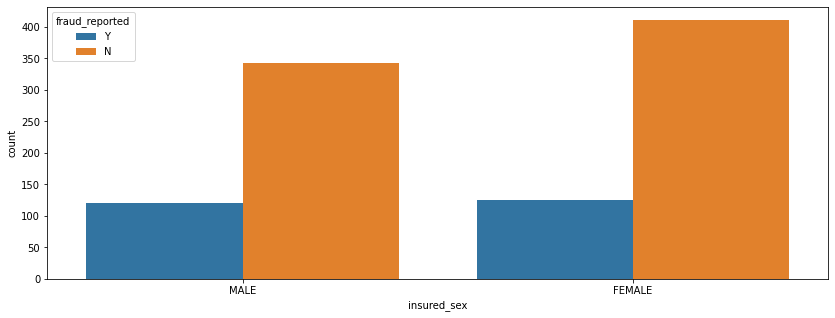

In [11]:
print(df['insured_sex'].value_counts())              #  lets check how many type variable in this Attribute

#      plotting coutplot of  'insured_sex'
plt.figure(figsize=(14,5))
sns.countplot(df['insured_sex'], hue= df['fraud_reported'])
#  Yes/No of  'fraud_reported' Variables are equally distributed with male, female  

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

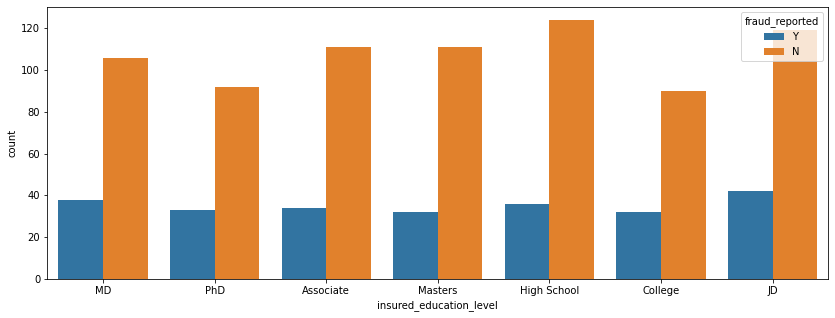

In [12]:
print(df['insured_education_level'].value_counts())          #  lets check how many type of variable in this Attribute

#       plotting coutplot of  'insured_education_level'
plt.figure(figsize=(14,5))
sns.countplot(df['insured_education_level'], hue= df['fraud_reported']) 

#  according to this countplot 'Education_level' no matter to 'fraud_reported' because Yes/No of 'fraud_reported' are
#  distributed same ratio  in all different types of education_level

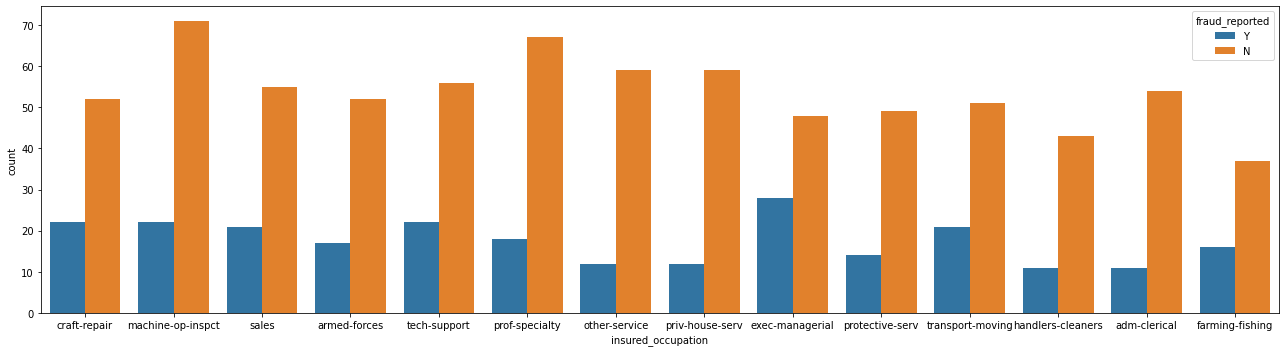

In [18]:
#       plotting coutplot of  'insured_occupation'
plt.figure(figsize=(18,5))
sns.countplot(df['insured_occupation'], hue= df['fraud_reported'])
plt.tight_layout()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

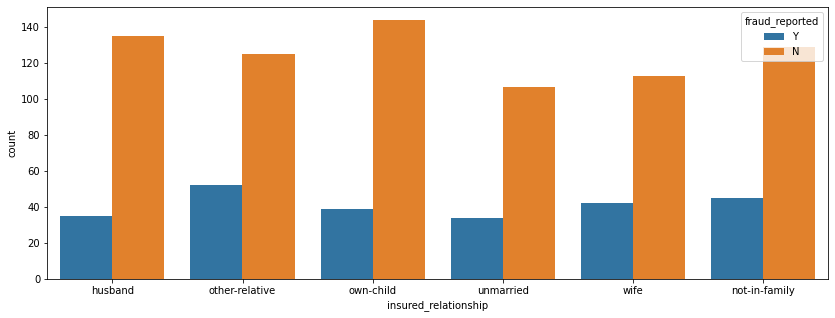

In [16]:
print(df['insured_relationship'].value_counts())          #  lets check how many type of variable in this Attribute

#   
plt.figure(figsize=(14,5))
sns.countplot(df['insured_relationship'], hue= df['fraud_reported'])

#  fraud_reported's variables are distributed in equal ratio with  insured_relationship's variable 

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


<AxesSubplot:xlabel='incident_type', ylabel='count'>

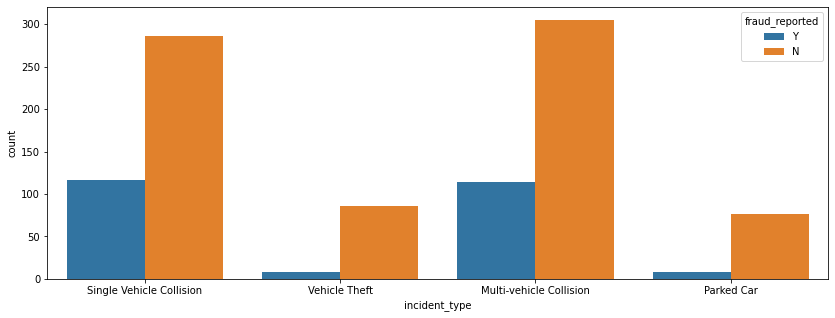

In [15]:
print(df['incident_type'].value_counts())          #  lets check how many type of variable in this Attribute

plt.figure(figsize=(14,5))
sns.countplot(df['incident_type'], hue= df['fraud_reported'])

# incident_type = 'Vehicle theft'& 'Parked car' then very less Fruad_reported equal to 'Yes'

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


<AxesSubplot:xlabel='police_report_available', ylabel='count'>

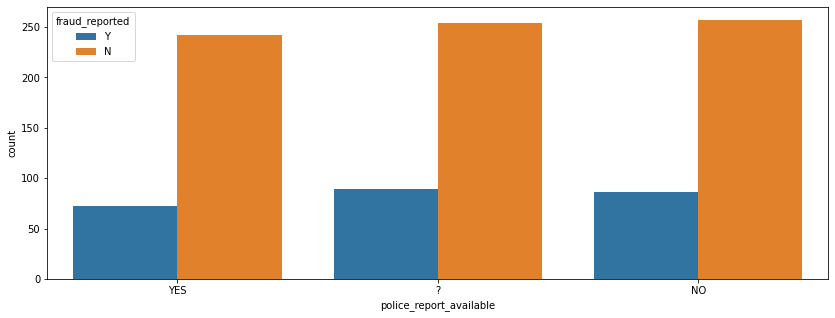

In [14]:
print(df['police_report_available'].value_counts())          #  lets check how many type of variable in this Attribute

#       plotting coutplot of  'police_report_available'
plt.figure(figsize=(14,5))
sns.countplot(df['police_report_available'], hue= df['fraud_reported'])

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


<AxesSubplot:xlabel='property_damage', ylabel='count'>

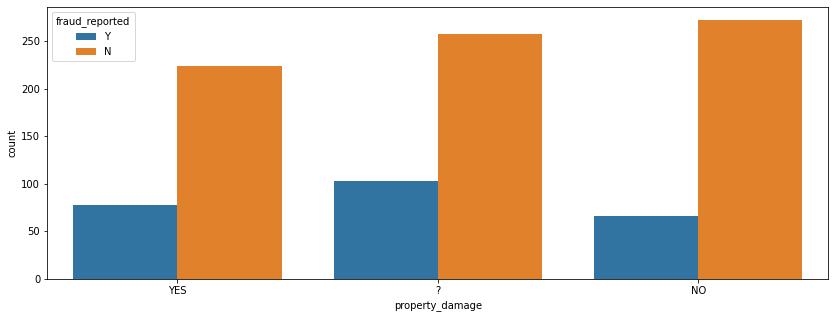

In [13]:
print(df['property_damage'].value_counts())          #  lets check how many type of variable in this Attribute

#       plotting coutplot of  'property_damage'
plt.figure(figsize=(14,5))
sns.countplot(df['property_damage'], hue= df['fraud_reported'])

In [9]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [13]:
#  convert into numerical form
df['fraud_reported']= df['fraud_reported'].map({'Y':1, 'N':0})


In [9]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

<AxesSubplot:>

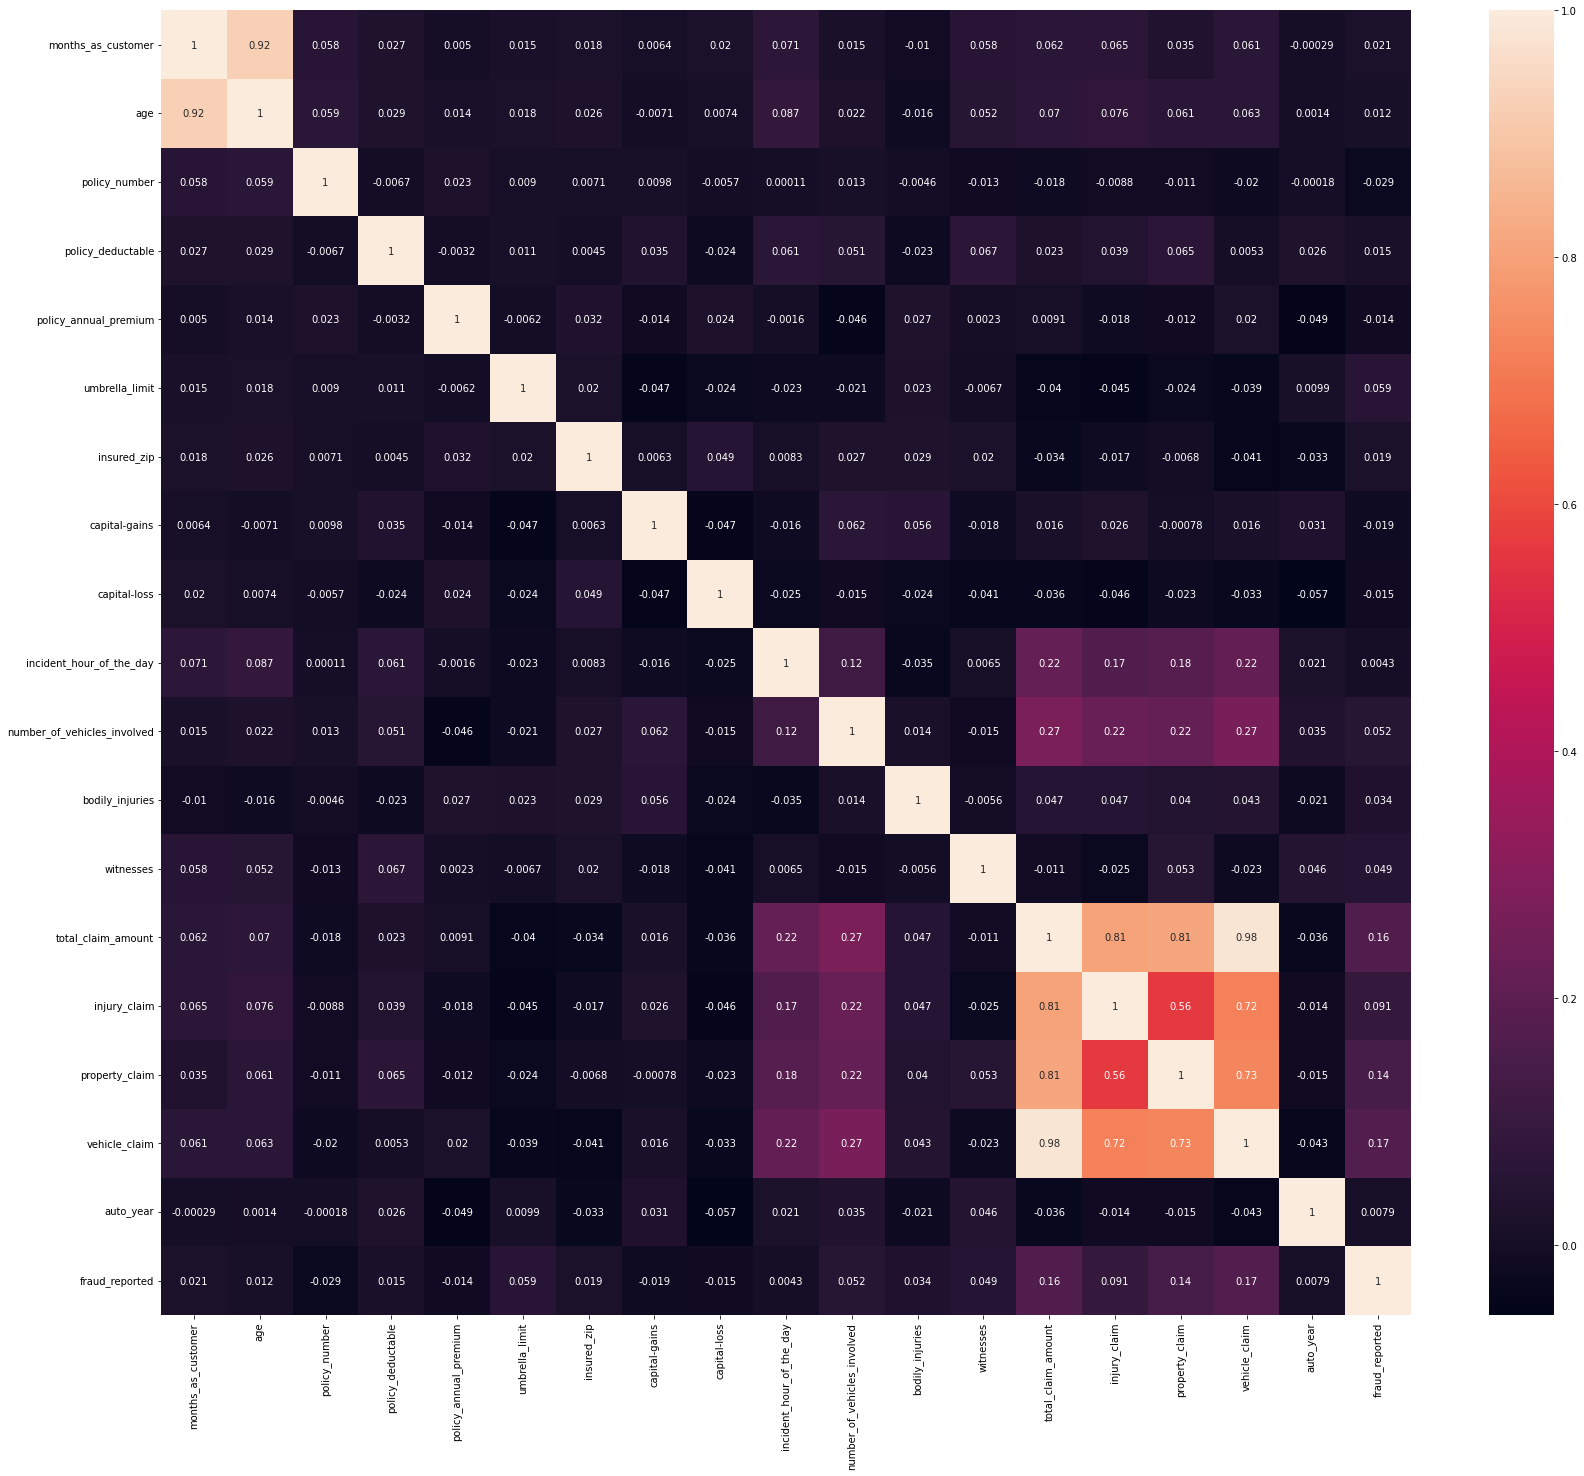

In [21]:
#
plt.figure(figsize=(28,24))
sns.heatmap(df.corr(), annot=True)

# no positive correlation seen any Variables with target-variable 
# a few columns are positive correlated with each other
# total_claim_amount,injury_claim,property_claim, vehicle_claim these all are  positive correlated to each other

<Figure size 2880x2880 with 0 Axes>

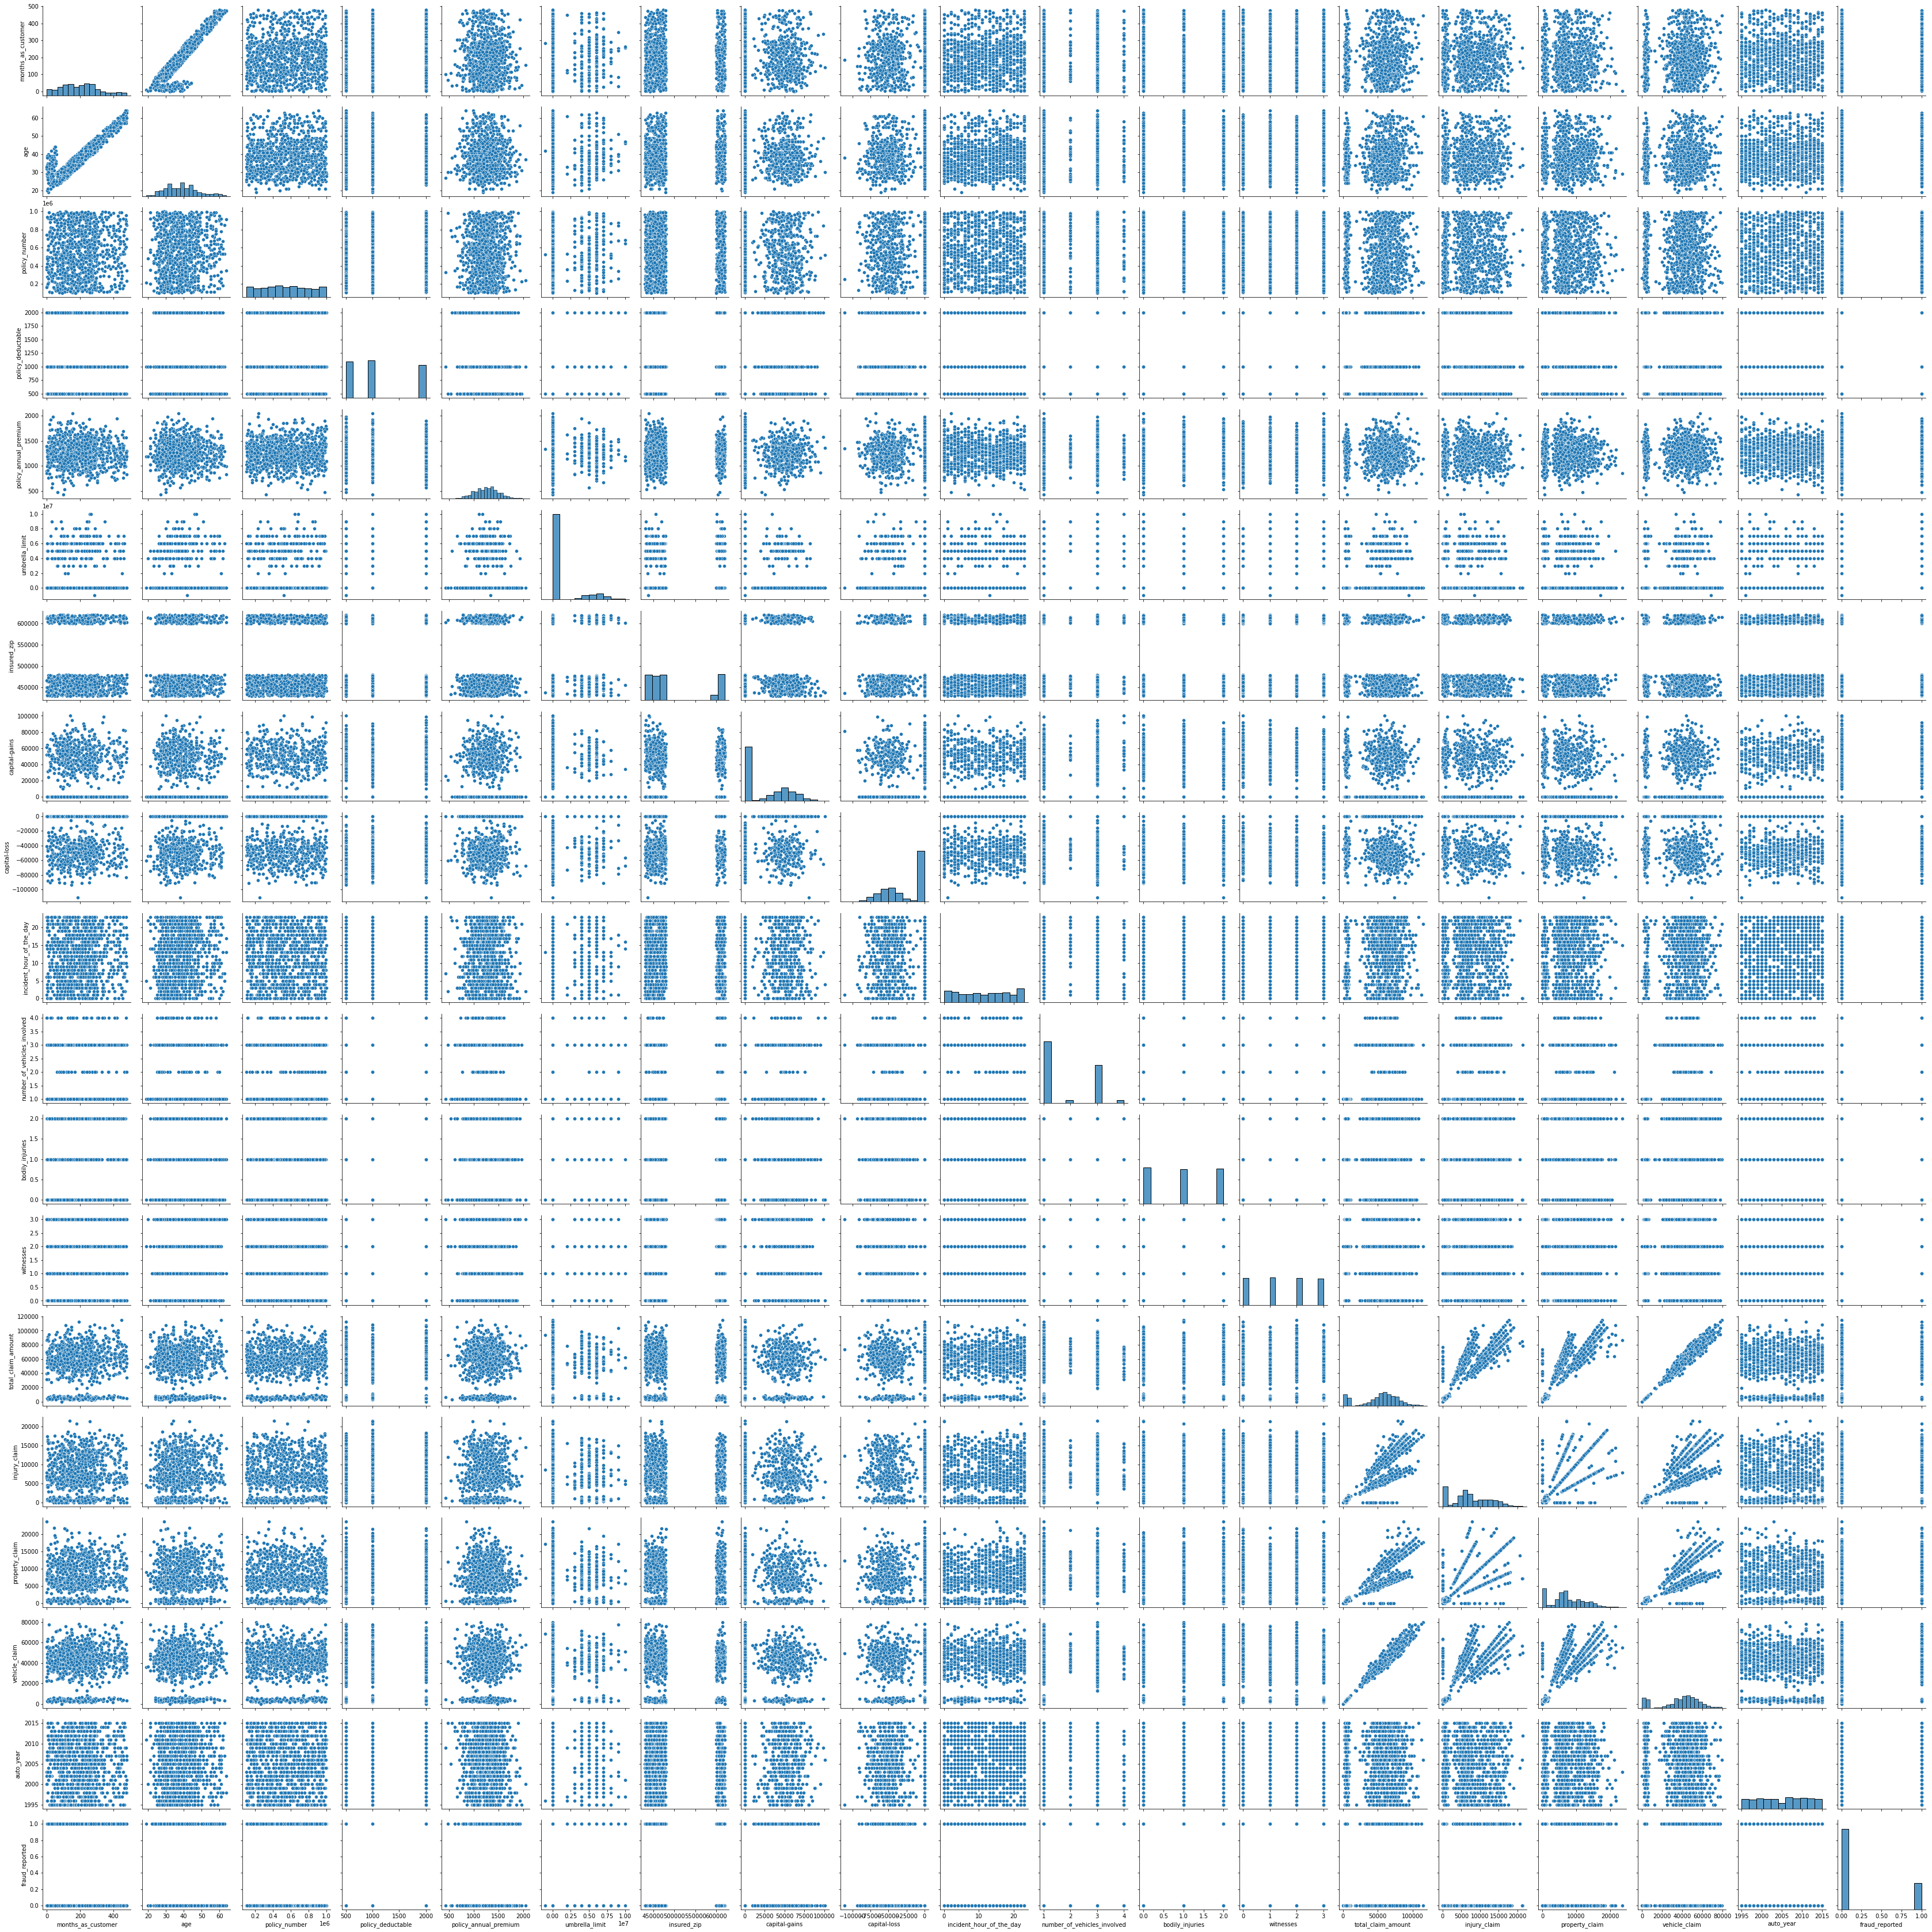

In [22]:
# 
 #    PLOTTING PAIRPLOT OF THE DATASET

plt.figure(figsize=(40,40))       #    PLOTTING PAIRPLOT OF THE DATASET
sns.pairplot(df)
plt.show()

<AxesSubplot:xlabel='policy_state', ylabel='count'>

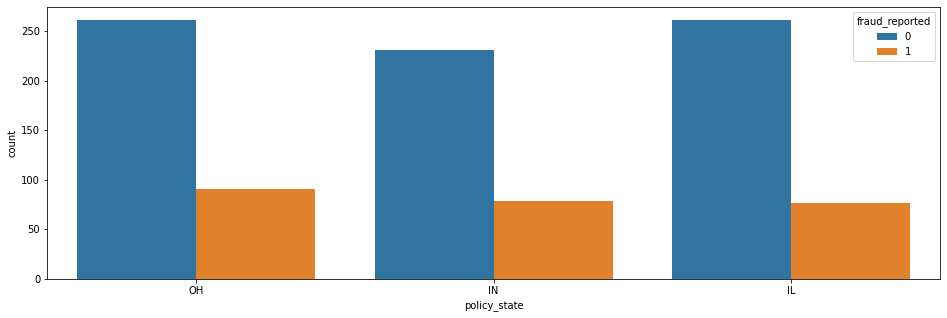

In [49]:
#  plotting countplot of  'policy_state'
plt.figure(figsize=(16,5))
sns.countplot(df['policy_state'], hue=df['fraud_reported'])

# shown in coutplot , yes/No of  fraud_reported Variables are distributed  with all values of 
#     policy-state in same ratio

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

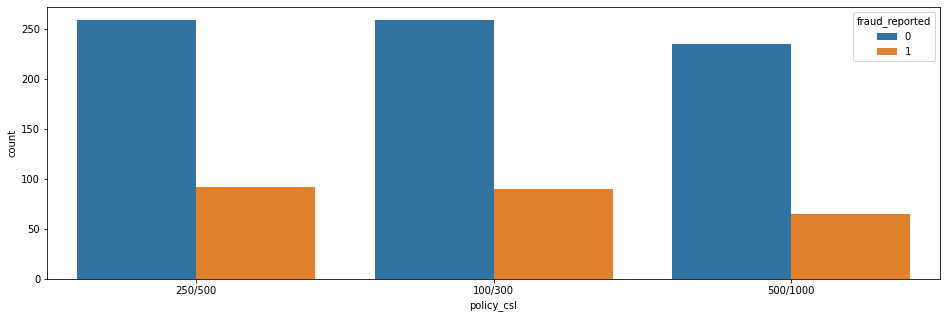

In [50]:
#
plt.figure(figsize=(16,5))
sns.countplot(df['policy_csl'], hue=df['fraud_reported'])

# shown in coutplot ,yes/No of fraud_reported Variables are distributed in same ratio with all values of policy-state 

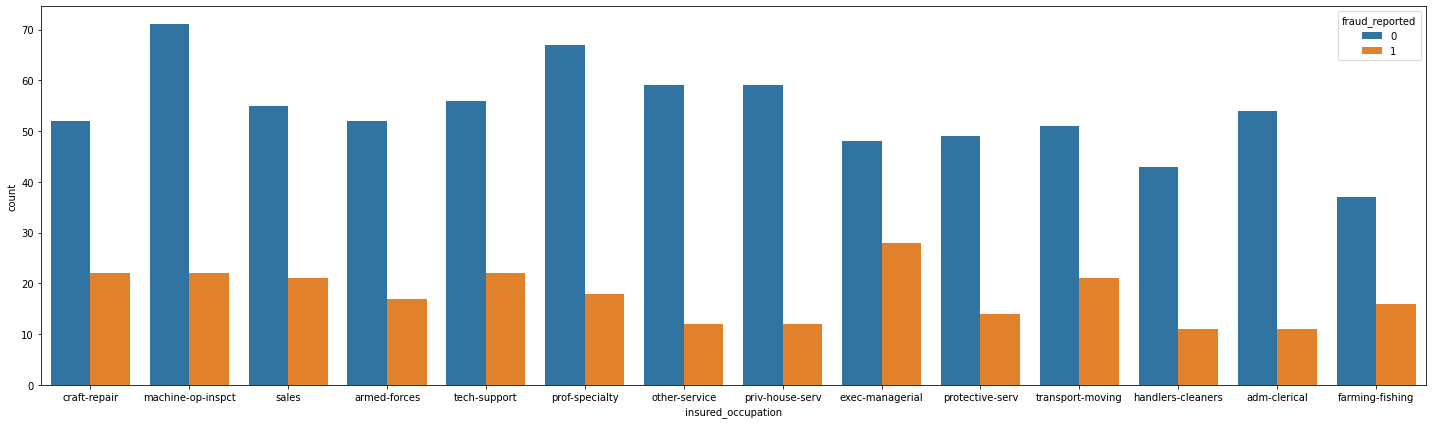

In [86]:
#
plt.figure(figsize=(20,6))
sns.countplot(df['insured_occupation'], hue=df['fraud_reported'])
plt.tight_layout()

#
#

<AxesSubplot:xlabel='age', ylabel='policy_annual_premium'>

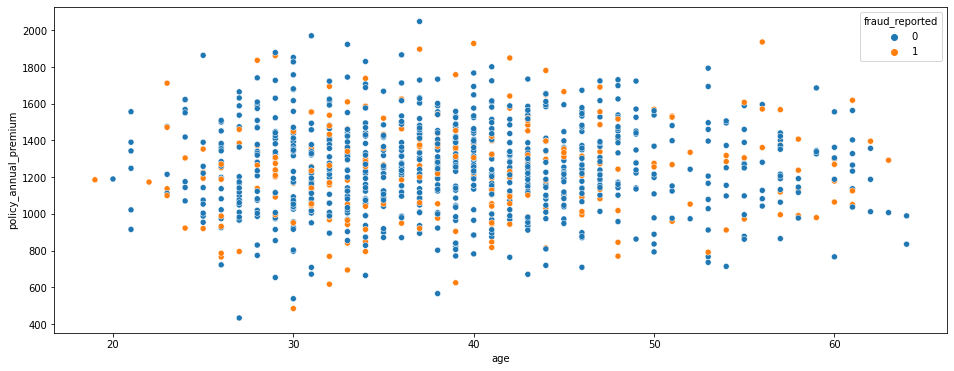

In [53]:
#  'age' & 'policy_annual_premium'  both are randomly distributed with each other , no any type of relation visible  with 
#                                                         ' fraud_reported' in this plot 

plt.figure(figsize=(16,6))
sns.scatterplot(df['age'],df['policy_annual_premium'], hue=df['fraud_reported'])

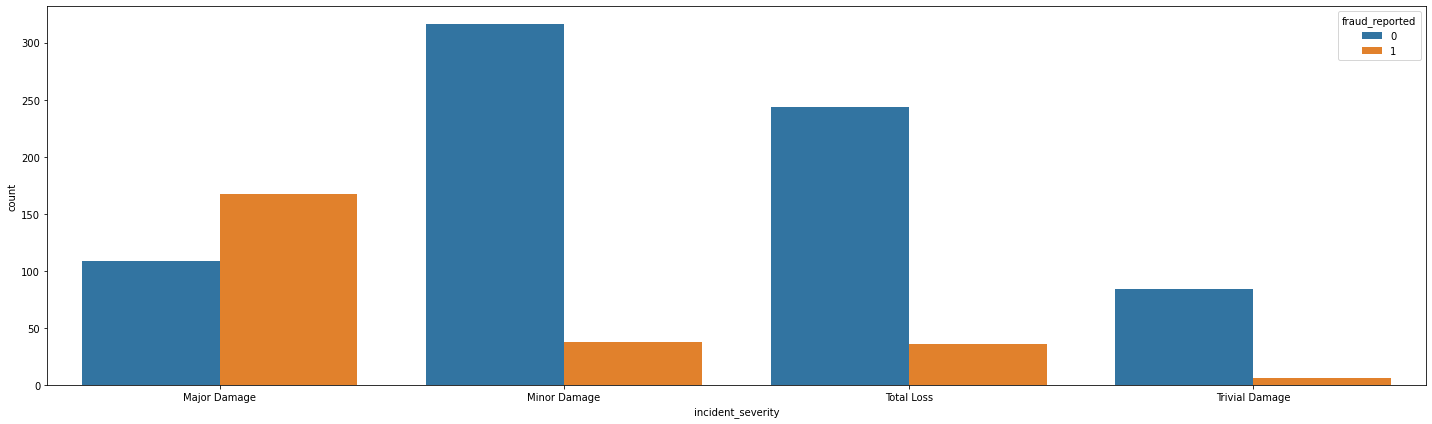

In [62]:
#
plt.figure(figsize=(20,6))
sns.countplot(df['incident_severity'], hue=df['fraud_reported'])
plt.tight_layout()
#   incident_severity= 'Major Damage' then maximum probability to   fraud_reported = yes  
#   incident_severity= ('Minor Damage','Trivial Damage'& Total Loss) then maximum probability to   fraud_reported = No  


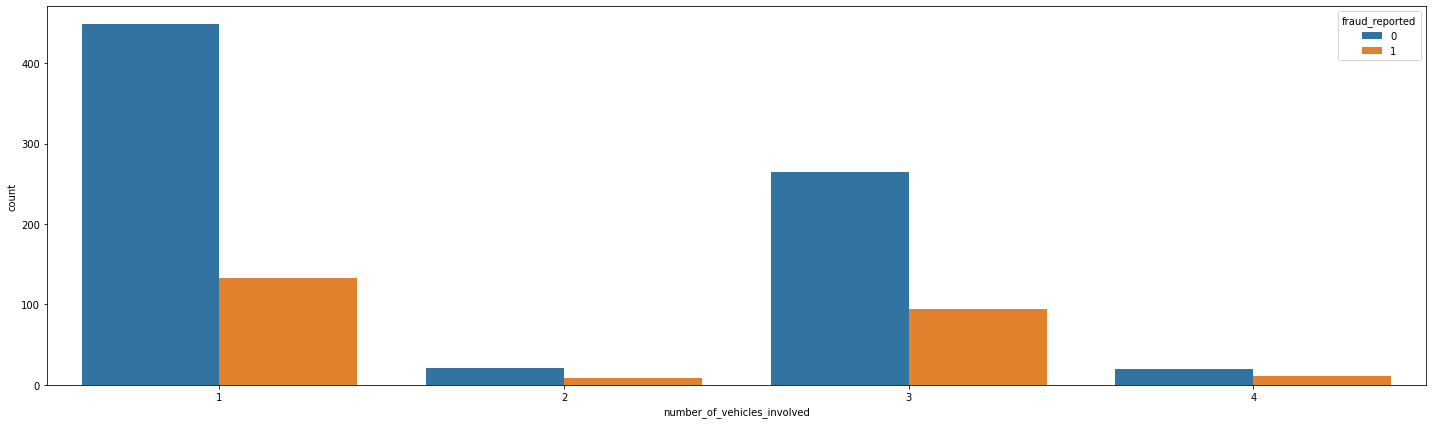

In [73]:
# lets check  in which ways  elements of 'bodily_injuries' Variables are  distributed with 'fraud_reported' elements
plt.figure(figsize=(20,6))
sns.countplot(df['bodily_injuries'], hue=df['fraud_reported'])
plt.tight_layout()

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

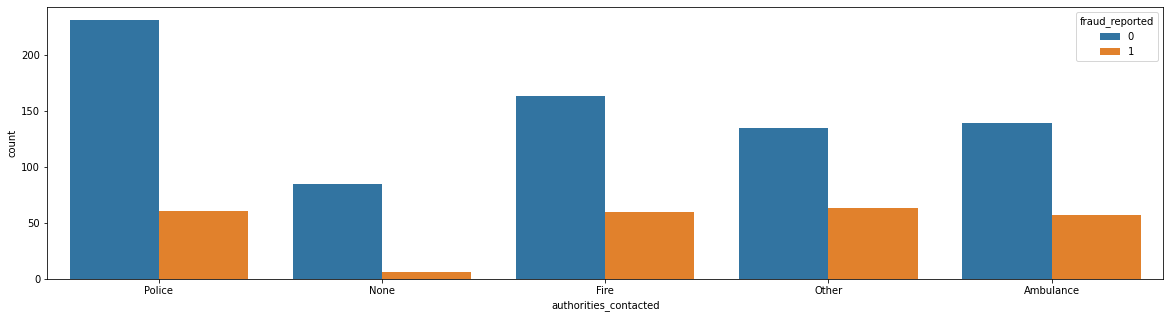

In [84]:

plt.figure(figsize=(20,5))
sns.countplot(df['authorities_contacted'], hue= df['fraud_reported'])
# when authorities_contacted= 'None' then minimum chance to fraud_reported = Yes

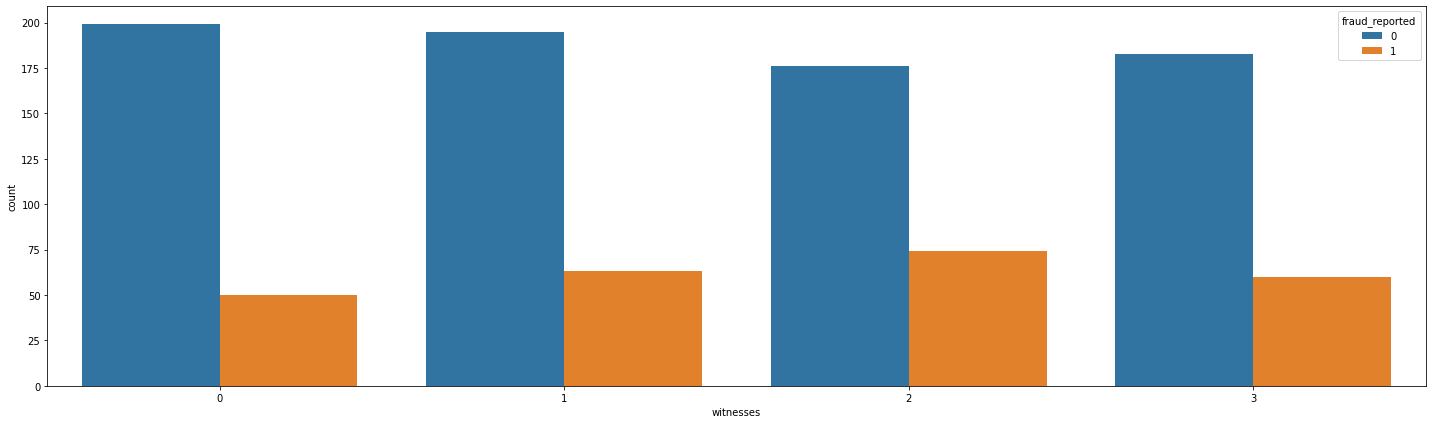

In [83]:
#
plt.figure(figsize=(20,6))
sns.countplot(df['witnesses'], hue=df['fraud_reported'])
plt.tight_layout()

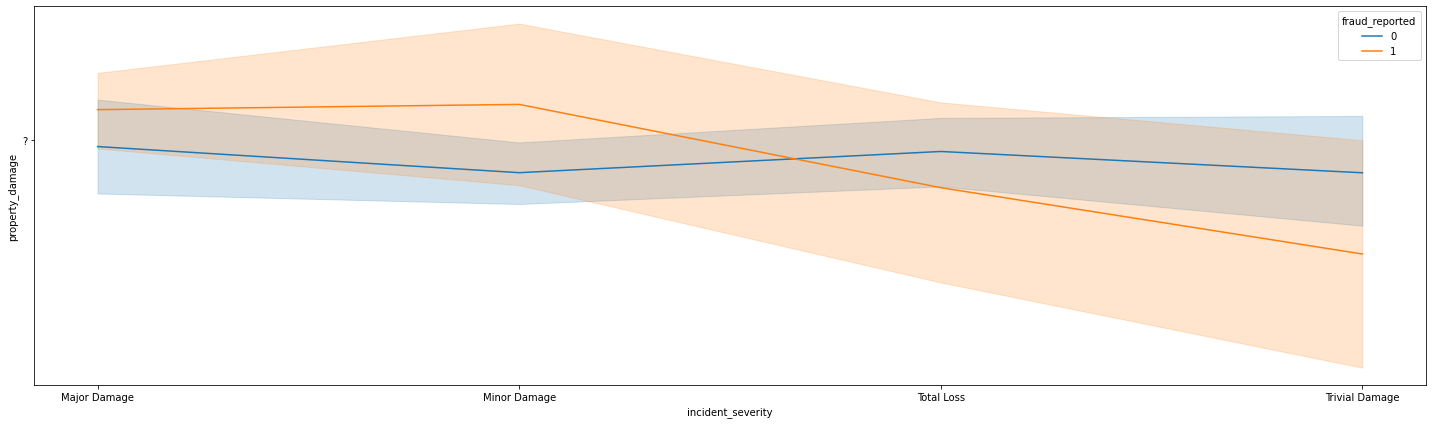

In [85]:
#
plt.figure(figsize=(20,6))
sns.lineplot(df['incident_severity'] ,df['property_damage'], hue=df['fraud_reported'])
plt.tight_layout()

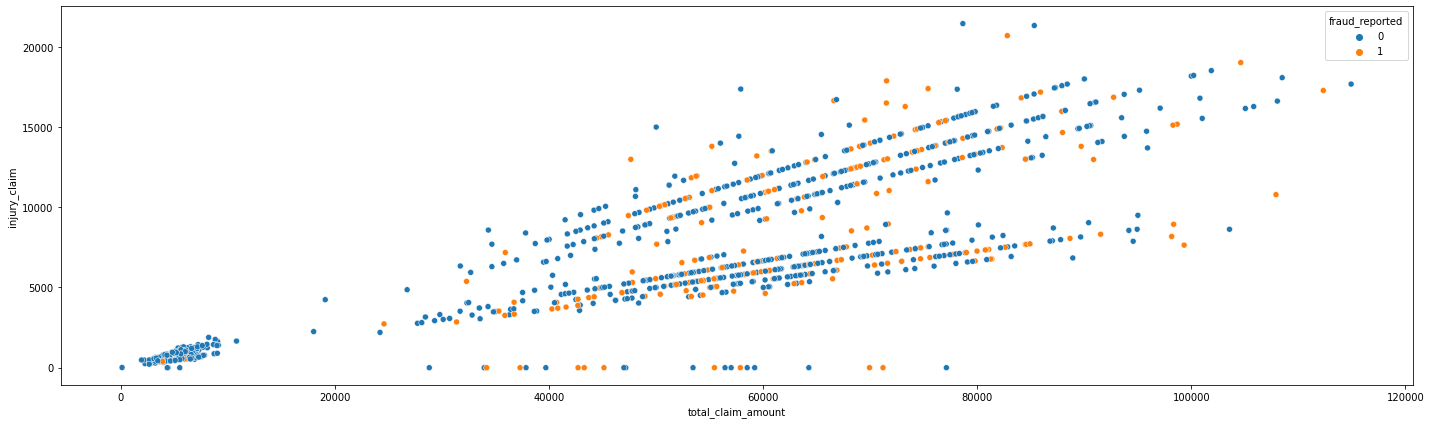

In [75]:
#
plt.figure(figsize=(20,6))
sns.scatterplot(df['total_claim_amount'] ,df['injury_claim'], hue=df['fraud_reported'])
plt.tight_layout()

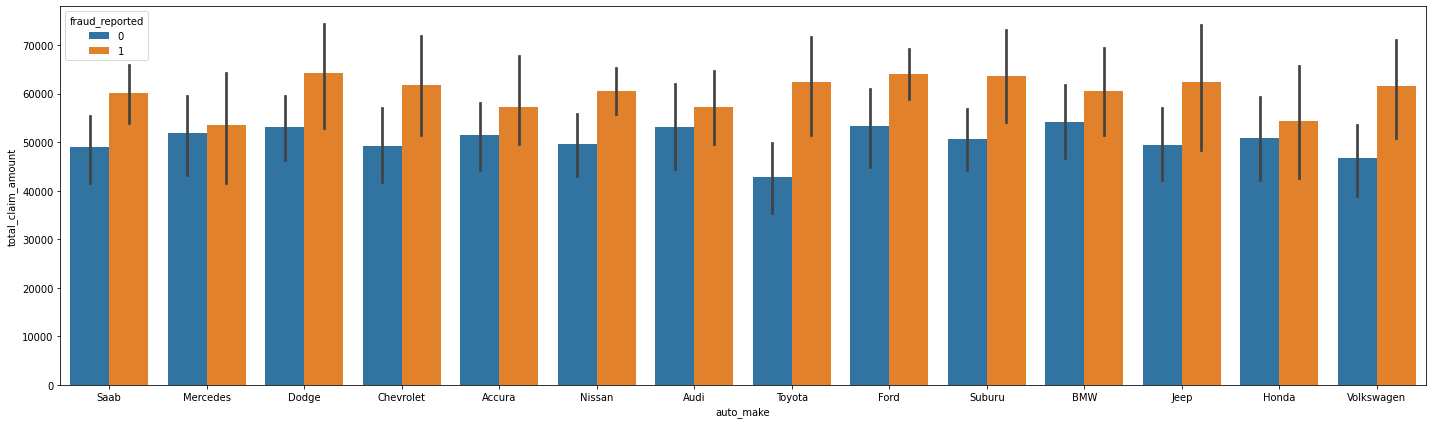

In [77]:
#
plt.figure(figsize=(20,6))
sns.barplot(df['auto_make'] ,df['total_claim_amount'], hue=df['fraud_reported'])
plt.tight_layout()

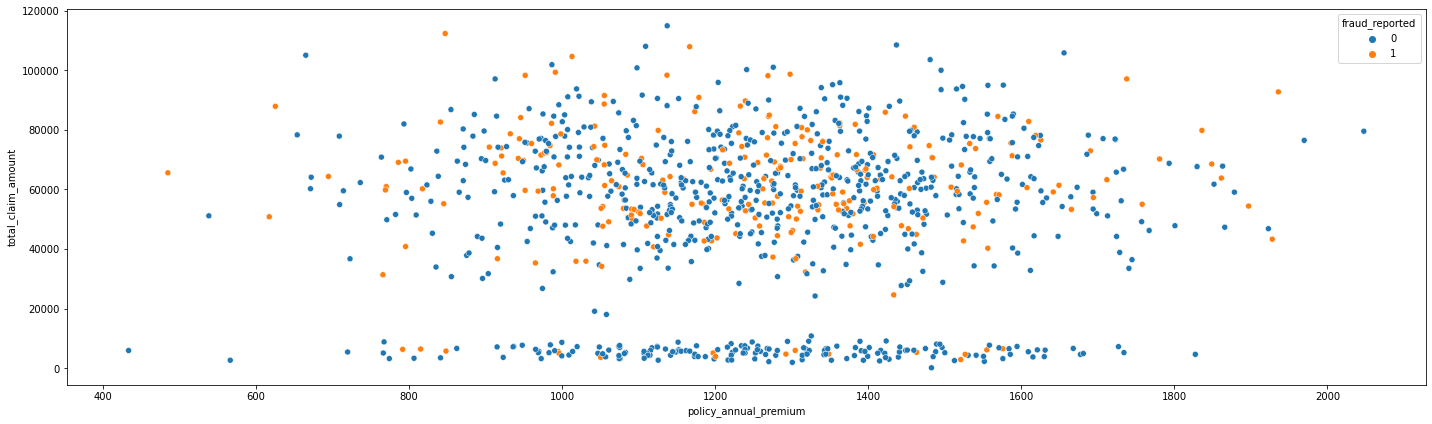

In [82]:
#
plt.figure(figsize=(20,6))
sns.scatterplot(df['policy_annual_premium'] ,df['total_claim_amount'], hue=df['fraud_reported'])
plt.tight_layout()

In [10]:
#
df['incident_date']= df['incident_date'].astype('datetime64')

In [11]:
# creating new columns from  incident_date'

df['incident_day'] = df['incident_date'].dt.day            #  incident_day  column
df['incident_month'] = df['incident_date'].dt.month        #   incident_month  column
df['incident_year'] = df['incident_date'].dt.year           #   incident_year  column


In [12]:
#
df = df.drop(['policy_bind_date','incident_date'], axis=1)
df= df.drop('policy_number', axis=1)
#
# 'policy_number' are unique no. that show information of specific policy-holder & it is not important to predict
#     the 'fraud_reported' so dropped this columns 
#   'policy_bind_year' columns will not give any information for predicting the 'fraud_reported' so also dropped this column

In [15]:
# drop these unnecessary columns ('incident_location','auto_model','auto_year','insured_relationship','insured_hobbies' )
#   for example 'insured_hobbies' if holders claim to insurance company for own property loss then insurance company 
#   doesn't considers over holders 'hobbies' or which year his property made , incident-location nothing like that happens 
#  so dropped these columns

df = df.drop(['incident_location','auto_model','auto_year','insured_relationship','insured_hobbies'], axis=1)


In [16]:
#
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for i in df.select_dtypes(include= 'object').columns:
    d =le.fit_transform(df[i])
    df[i] = d
                                 # label encoder convert categorical value  into  numerical type

In [27]:

df.sample(6)

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
904                  97   27             2           2                500   
342                  66   26             0           1               1000   
752                 405   55             0           1                500   
641                 362   55             2           0               1000   
143                  22   29             1           1               2000   
676                  32   29             2           0                500   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
904                1588.26               0       434370            0   
342                 988.29               0       476502            1   
752                 878.19               0       441533            1   
641                1097.99               0       442239            0   
143                1238.62         6000000       463993            1   
676                1446.98               0       436560            1   

     insured_education_level  insured_occupation  capital-gains  capital-loss  \
904                        2                  12          56700        -49300   
342                        1                   1              0             0   
752                        6                   6          57100             0   
641                        3                   7          44400        -71500   
143                        4                   3              0        -56200   
676                        4                   0              0        -45700   

     incident_type  collision_type  incident_severity  authorities_contacted  \
904              0               3                  2                      3   
342              2               2                  0                      4   
752              0               2                  1                      1   
641              0               2                  2                      4   
143              2               2                  0                      0   
676              0               1                  1                      0   

     incident_state  incident_city  incident_hour_of_the_day  \
904               5              5                        22   
342               1              3                         8   
752               0              3                         2   
641               1              2                         0   
143               4              6                        14   
676               1              0                        11   

     number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  \
904                            3                2                2          1   
342                            1                0                2          2   
752                            4                2                0          2   
641                            3                1                0          3   
143                            1                0                2          3   
676                            3                2                2          0   

     police_report_available  total_claim_amount  injury_claim  \
904                        2               75690          8410   
342                        2               57860             0   
752                        1               38640          4830   
641                        1               39690             0   
143                        0               70800          7080   
676                        1               57970         10540   

     property_claim  vehicle_claim  auto_make  fraud_reported  
904            8410          58870         10               0  
342           10520          47340         11               1  
752            4830          28980          3               0  
641               0          39690         11               0  
143           14160          49

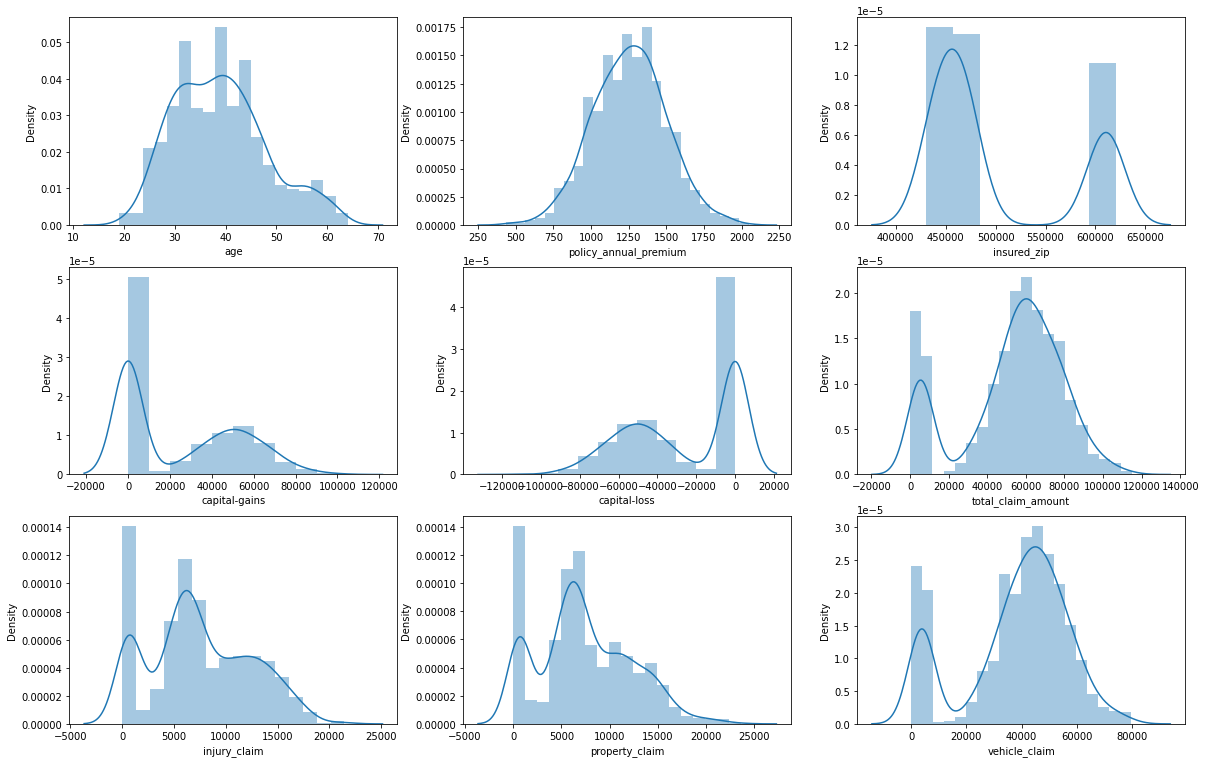

In [17]:
colum= ['age','policy_annual_premium','insured_zip','capital-gains','capital-loss',
           'total_claim_amount','injury_claim','property_claim','vehicle_claim']

# lets see how is data distributed for every columns  / CHECK DATA IS NORMAAL DISTRIBUTED OR NOT

plt.figure(figsize=(20,13))
p=1
for col in colum:
    if p <=9:
        ax = plt.subplot(3,3,p)
        sns.distplot(df[col])
        plt.xlabel=(col)
    p+=1    
plt.show()        

In [18]:
df[['age','policy_annual_premium','capital-gains','capital-loss',
           'total_claim_amount','injury_claim','property_claim','vehicle_claim']].skew()

age                      0.478988
policy_annual_premium    0.004402
capital-gains            0.478850
capital-loss            -0.391472
total_claim_amount      -0.594582
injury_claim             0.264811
property_claim           0.378169
vehicle_claim           -0.621098
dtype: float64

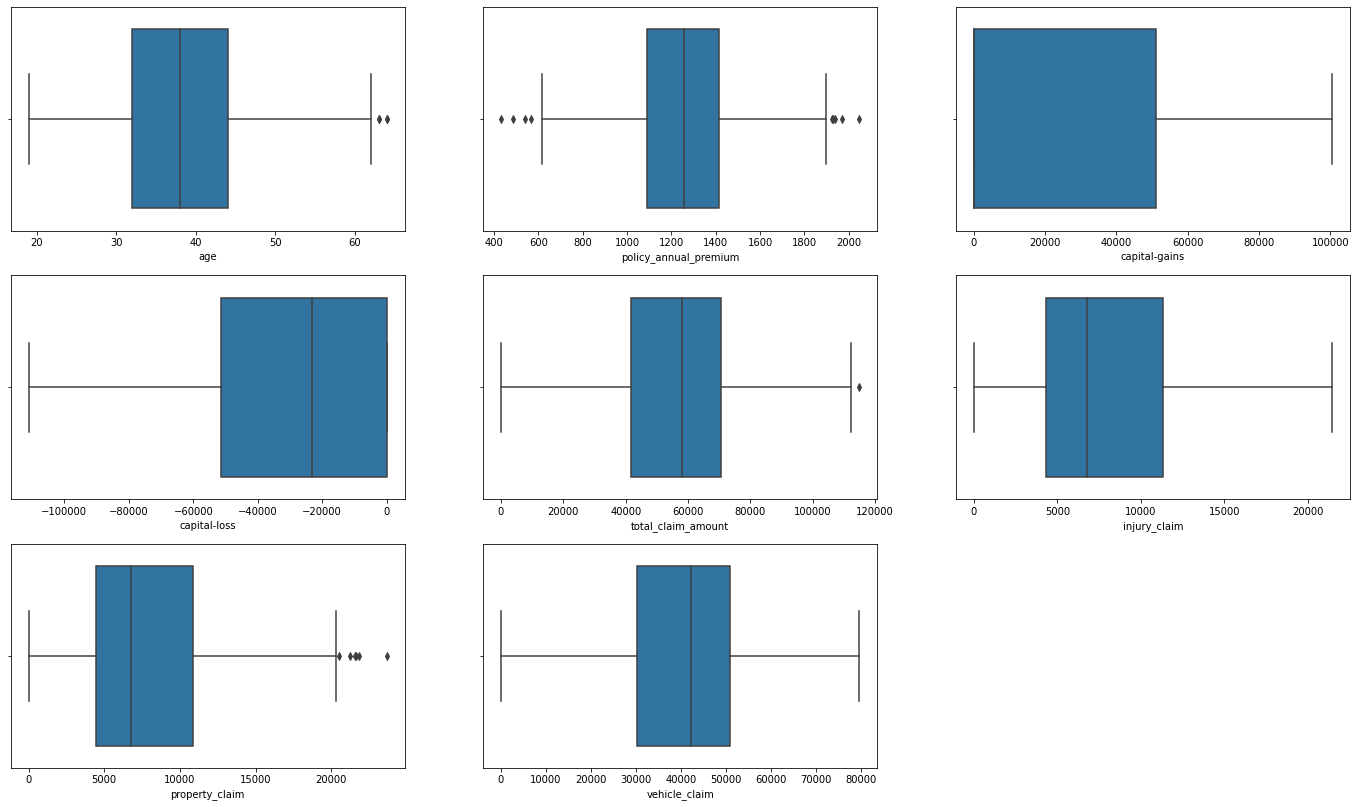

In [20]:
plt.figure(figsize=(24,14))
p= 1
colum= df[['age','policy_annual_premium','capital-gains','capital-loss','total_claim_amount',
           'injury_claim','property_claim','vehicle_claim']]

for col in colum:
    if p<=8:                                      
        ax=plt.subplot(3,3,p)                          
        sns.boxplot(df[col])
    p+=1
plt.show()

In [34]:
#  CHCECKING OUTLIERS

from scipy.stats import zscore
print((zscore(colum)<3).all())


age                       True
policy_annual_premium    False
capital-gains             True
capital-loss              True
total_claim_amount        True
injury_claim              True
property_claim           False
vehicle_claim             True
dtype: bool


In [21]:
# REMOVING OUTLIERS BY ZSCORE METHOD

from scipy.stats import zscore

z_scores=zscore(colum)
df_new = df.loc[(abs(z_scores)<2.9).all(axis=1)]
print('original dataset= ', df.shape)
print('new_dataset = ', df_new.shape)

original dataset=  (1000, 34)
new_dataset =  (990, 34)


In [22]:
#
df[df['property_claim']>=20000]   # these are outliers 

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
163                 112   30             2           2               1000   
299                 119   27             1           1               2000   
301                 107   31             0           0               2000   
421                 147   37             1           1               1000   
500                   1   29             2           2                500   
591                  43   43             0           2                500   
687                 194   41             0           1                500   
745                 258   41             0           0                500   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
163                1166.54               0       479852            0   
299                1097.64               0       614812            1   
301                1018.73         5000000       469646            1   
421                1306.78               0       466818            1   
500                 854.58               0       612826            0   
591                1320.39               0       604861            0   
687                1203.81               0       613119            1   
745                1042.25               0       601206            1   

     insured_education_level  insured_occupation  capital-gains  capital-loss  \
163                        5                   9          47700        -59300   
299                        2                  13          27100             0   
301                        0                   5          20000        -82700   
421                        4                   9              0             0   
500                        3                   2          52200             0   
591                        0                   1              0             0   
687                        3                  13          52500        -51300   
745                        5                   3              0        -44400   

     incident_type  collision_type  incident_severity  authorities_contacted  \
163              2               1                  0                      1   
299              0               2                  0                      3   
301              0               3                  2                      4   
421              2               1                  2                      0   
500              2               3                  1                      4   
591              2               2                  0                      0   
687              0               2                  1                      4   
745              0               2                  0                      1   

     incident_state  incident_city  incident_hour_of_the_day  \
163               4              0                         3   
299               3              3                        16   
301               1              5                        21   
421               4              3                        22   
500               4              4                        15   
591               6              0                        16   
687               6              6                        17   
745               0              5                         0   

     number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  \
163                            1                2                2          0   
299                            2                1                1          0   
301                            3                2                1          2   
421                            1                0                1          0   
500                            1                0                2          3   
591                            1                0                2          1   
687                            3                0                0 

In [23]:
x= df_new.drop('fraud_reported', axis=1)     # input-features

y= df_new.fraud_reported               # target-Attributes

In [24]:
# make sure to  use 'variance_inflation_factor' method to check  multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


features= x.columns
vif_value= [vif(x.values, i) for i in range(len(x.columns))]

pd.DataFrame({'features':features,'vif_value':vif_value})   #


features   vif_value
0            months_as_customer    6.927334
1                           age    6.957610
2                  policy_state    1.029773
3                    policy_csl    1.022153
4             policy_deductable    1.038230
5         policy_annual_premium    1.035577
6                umbrella_limit    1.025207
7                   insured_zip    1.032244
8                   insured_sex    1.026332
9       insured_education_level    1.037636
10           insured_occupation    1.018969
11                capital-gains    1.031247
12                 capital-loss    1.028754
13                incident_type    5.080254
14               collision_type    1.716844
15            incident_severity    1.206590
16        authorities_contacted    1.065706
17               incident_state    1.031687
18                incident_city    1.019592
19     incident_hour_of_the_day    1.100537
20  number_of_vehicles_involved    5.087275
21              property_damage    1.030944
22              bodily_injuries    1.023639
23                    witnesses    1.037821
24      police_report_available    1.026307
25           total_claim_amount         inf
26                 injury_claim         inf
27               property_claim         inf
28                vehicle_claim         inf
29                    auto_make    1.037291
30                 incident_day    1.837612
31               incident_month    1.853425
32                incident_year  202.824964

In [25]:
x= x.drop(['age', 'insured_zip','incident_year',], axis=1)   # input variable 

In [26]:
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.metrics import *

In [47]:
sc= StandardScaler()
scaled= sc.fit_transform(x)
scaled= pd.DataFrame(scaled, columns=x.columns)

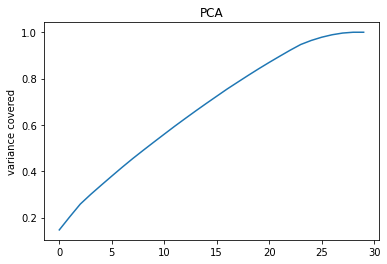

In [50]:
from sklearn.decomposition import PCA

#  USING PCA          USE AFTER STANDARDSCALING
pca= PCA()
pca.fit_transform(scaled)

#  let's plot scree plot to check the how many feature are covered more 
                                            #            variance (that call best component)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.ylabel('variance covered')
plt.title('PCA')
plt.show()


In [54]:
#  from using PCA  we get 25 PCA_components which covered about 90 percent variance of data

pca= PCA(n_components= 25)
new_comp= pca.fit_transform(scaled)
p_comp= pd.DataFrame(new_comp, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12'
                                        'pc13','pc14','pc15','pc16','pc17','pc18','pc19','pc20','pc21','pc22', 'pc23','pc24','pc25','pc26' ])

In [34]:
#     MAKE FUNCTION FOR BEST RANDOM_STATE        IN TRAINING PROCESS         # finding best random_state

def max_score(model,p_comp,y):
    max_score = 0
    rs= 0

    for r_state in range(50,120):
        x_train,x_test,y_train,y_test=train_test_split(p_comp, y,random_state = r_state,test_size=0.30,)
    
            
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        tmp=accuracy_score(y_test,y_pred)
            #print("random state :",r_state," and f1 score: ",tmp)
        
        if tmp>max_score:
            max_score=tmp
            rs=r_state
            print("maximum accuracy_score is at random state :",rs," and it is :",max_score)
            

In [29]:

from sklearn.model_selection import cross_val_score as CVS
from sklearn.model_selection import KFold
kfold= KFold(n_splits=12, shuffle=True, random_state=59)


    
def model_score(model,xtrain,ytrain,x_test,y_test):
    model.fit(xtrain,ytrain)
    pred= model.predict(xtrain)
    y_pred= model.predict(x_test)
    print('training_score =', accuracy_score(ytrain,pred))
        
    print('test_accuracy_score=', accuracy_score(y_test,y_pred))
    print('classification_report \n', classification_report(y_test,y_pred))
    print('roc_auc_score =', roc_auc_score(y_test,y_pred))

def cross_val(model,xtrain,ytrain,algo):
        
    cv_score= CVS(model,xtrain,ytrain,cv= kfold,)
    print('cross_val_score with', algo,'=', cv_score.mean())
    

In [55]:
###      TRAIN  THE  MODEL  WITH  LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
max_score(LR, p_comp, y)

maximum accuracy_score is at random state : 50  and it is : 0.7609427609427609
maximum accuracy_score is at random state : 51  and it is : 0.8047138047138047
maximum accuracy_score is at random state : 87  and it is : 0.8080808080808081
maximum accuracy_score is at random state : 95  and it is : 0.8148148148148148


In [81]:
x_train,x_test,y_train,y_test=train_test_split(p_comp, y,random_state = 51,test_size=0.30)
model_score(LR,x_train,y_train,x_test,y_test)

training_score = 0.8037518037518038
test_accuracy_score= 0.8047138047138047
classification_report 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       228
           1       0.61      0.43      0.51        69

    accuracy                           0.80       297
   macro avg       0.73      0.68      0.69       297
weighted avg       0.79      0.80      0.79       297

roc_auc_score = 0.6757246376811593


In [87]:
###############                                 TRAIN  THE  MODEL  WITH  SVm-CLASSIFIER

from sklearn.svm import SVC
svm= SVC()
max_score(svm , p_comp, y)

maximum accuracy_score is at random state : 50  and it is : 0.7575757575757576
maximum accuracy_score is at random state : 51  and it is : 0.7710437710437711
maximum accuracy_score is at random state : 58  and it is : 0.7811447811447811
maximum accuracy_score is at random state : 69  and it is : 0.7878787878787878
maximum accuracy_score is at random state : 77  and it is : 0.7946127946127947
maximum accuracy_score is at random state : 98  and it is : 0.8215488215488216


In [88]:
x_train,x_test,y_train,y_test=train_test_split(p_comp, y,random_state = 98,test_size=0.30)
model_score(svm,x_train,y_train,x_test,y_test)

training_score = 0.8802308802308803
test_accuracy_score= 0.8215488215488216
classification_report 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       236
           1       0.75      0.20      0.31        61

    accuracy                           0.82       297
   macro avg       0.79      0.59      0.60       297
weighted avg       0.81      0.82      0.78       297

roc_auc_score = 0.5898860794665185


In [57]:

###                                 TRAIN  THE  MODEL  WITH  EXTRATREES-CLASSIFIER
from sklearn.ensemble import ExtraTreesClassifier
TC= ExtraTreesClassifier(bootstrap=True, oob_score=True)
max_score(TC , p_comp, y)

maximum accuracy_score is at random state : 50  and it is : 0.7575757575757576
maximum accuracy_score is at random state : 51  and it is : 0.7676767676767676
maximum accuracy_score is at random state : 58  and it is : 0.7912457912457912
maximum accuracy_score is at random state : 98  and it is : 0.8013468013468014


In [62]:
x_train,x_test,y_train,y_test=train_test_split(p_comp, y,random_state = 98,test_size=0.30)
model_score(TC,x_train,y_train,x_test,y_test)

training_score = 1.0
test_accuracy_score= 0.8013468013468014
classification_report 
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       236
           1       0.75      0.05      0.09        61

    accuracy                           0.80       297
   macro avg       0.78      0.52      0.49       297
weighted avg       0.79      0.80      0.72       297

roc_auc_score = 0.5224715198666297


In [59]:

##                  TRAIN  THE  MODEL  WITH  RANDOMFOREST-CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(oob_score= True)
max_score(RF , p_comp, y)

maximum accuracy_score is at random state : 50  and it is : 0.7575757575757576
maximum accuracy_score is at random state : 51  and it is : 0.7845117845117845
maximum accuracy_score is at random state : 58  and it is : 0.7912457912457912
maximum accuracy_score is at random state : 73  and it is : 0.8013468013468014
maximum accuracy_score is at random state : 95  and it is : 0.8080808080808081
maximum accuracy_score is at random state : 98  and it is : 0.8148148148148148


In [63]:
x_train,x_test,y_train,y_test=train_test_split(p_comp, y,random_state = 98,test_size=0.30)
model_score(RF ,x_train,y_train,x_test,y_test)

training_score = 1.0
test_accuracy_score= 0.8215488215488216
classification_report 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       236
           1       0.90      0.15      0.25        61

    accuracy                           0.82       297
   macro avg       0.86      0.57      0.58       297
weighted avg       0.84      0.82      0.77       297

roc_auc_score = 0.571651847735482


In [65]:

###   TRAIN  THE  MODEL  WITH  DECISIONTREECLASSIFIER

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
max_score(DT, p_comp,y)

maximum accuracy_score is at random state : 50  and it is : 0.5993265993265994
maximum accuracy_score is at random state : 51  and it is : 0.6363636363636364
maximum accuracy_score is at random state : 52  and it is : 0.6632996632996633
maximum accuracy_score is at random state : 53  and it is : 0.6767676767676768
maximum accuracy_score is at random state : 57  and it is : 0.6868686868686869
maximum accuracy_score is at random state : 58  and it is : 0.7003367003367004
maximum accuracy_score is at random state : 74  and it is : 0.7037037037037037
maximum accuracy_score is at random state : 95  and it is : 0.7239057239057239
maximum accuracy_score is at random state : 104  and it is : 0.7272727272727273


In [67]:
x_train,x_test,y_train,y_test=train_test_split(p_comp, y,random_state = 104,test_size=0.30)
model_score(DT,x_train,y_train,x_test,y_test)

training_score = 1.0
test_accuracy_score= 0.6801346801346801
classification_report 
               precision    recall  f1-score   support

           0       0.79      0.78      0.79       227
           1       0.33      0.34      0.34        70

    accuracy                           0.68       297
   macro avg       0.56      0.56      0.56       297
weighted avg       0.68      0.68      0.68       297

roc_auc_score = 0.5634990560100693


In [ ]:
LETS USE CROSS_VALIDATION

In [68]:


x_train,x_test,y_train,y_test=train_test_split(p_comp, y,random_state = 98,test_size=0.30,)
cross_val(TC ,x_train,y_train,'Extratree-classifier')                             #   cross-validation   EXTRATREE-CLASSIFIER
print('*'*20)


x_train,x_test,y_train,y_test=train_test_split(p_comp, y,random_state = 98,test_size=0.30,)
cross_val(RF ,x_train,y_train, 'RandomForest')                           #  cross-validation    RANDOMFOREST-CLASSIFIER
print('*'*20)


x_train,x_test,y_train,y_test=train_test_split(p_comp, y,random_state = 95,test_size=0.30,)
cross_val(LR ,x_train,y_train, 'lOGISTIC-REGRESSION')                           #  cross-validation-score   LOGISTIC-REGRESSION
print('*'*20)


x_train,x_test,y_train,y_test=train_test_split(p_comp , y,random_state = 104,test_size=0.30,)
cross_val(DT ,x_train,y_train, 'DECISIONTREE CLASSIFIER')                          



cross_val_score with Extratree-classifier = 0.7332375478927203
********************
cross_val_score with RandomForest = 0.7404466626335955
********************
cross_val_score with lOGISTIC-REGRESSION = 0.7476557773744705
********************
cross_val_score with DECISIONTREE CLASSIFIER = 0.699737850373059


In [ ]:

WE GET maximum accuracy_score and cross_validation_score from  RANDOMFOREST, EXTRATREES, LOGISTICREGRESSION MODEL
NOW WE USE HYPERPARAMETER TUNNING ON THESE MODEL

In [69]:

#  HYPERPARAMATER TUNING   with                '''' ExtraTree-classification''''

x_train, x_test,y_train,y_test= train_test_split(p_comp, y, test_size=0.30, random_state= 98)
param= {'n_estimators':[180, 280],'max_depth':[6,8,13,15] ,'min_samples_split':[2,3],'min_samples_leaf':[1,2,3] }
grid = GridSearchCV(TC ,param, cv=kfold,n_jobs=-1)

grid.fit(x_train,y_train)
print('best_parameter=', grid.best_params_ ,'\n')

best_parameter= {'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 180} 



In [84]:
x_train, x_test,y_train,y_test= train_test_split(p_comp, y, test_size=0.30, random_state= 98)
G_ET = ExtraTreesClassifier(max_depth=13,oob_score=True,n_estimators=880,bootstrap=True,)
G_ET.fit(x_train, y_train)
ET_pred = G_ET.predict(x_test)

print('accuracy_score=', accuracy_score(y_test, ET_pred))
print('classification_report \n ', classification_report(y_test, ET_pred), '\n')
print('confusion_matrix \n ', confusion_matrix(y_test, ET_pred), '\n')
print('roc_auc_score =', roc_auc_score(y_test, ET_pred))

accuracy_score= 0.7946127946127947
classification_report 
                precision    recall  f1-score   support

           0       0.79      1.00      0.89       236
           1       0.00      0.00      0.00        61

    accuracy                           0.79       297
   macro avg       0.40      0.50      0.44       297
weighted avg       0.63      0.79      0.70       297
 

confusion_matrix 
  [[236   0]
 [ 61   0]] 

roc_auc_score = 0.5


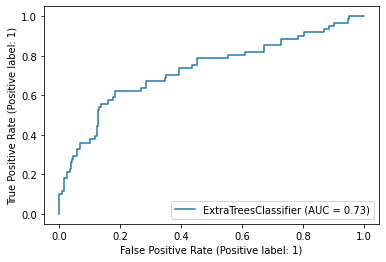

In [85]:
# plot roc_curve with hypertunned Extratrees_classifier
plot_roc_curve(G_ET, x_test, y_test)

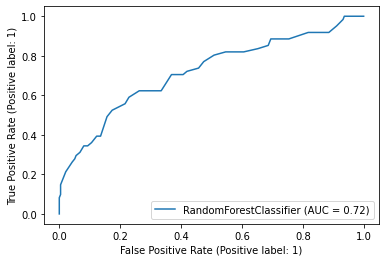

In [90]:
# # plot roc_curve  with  LOGITIC_REGRESSION MODEL, THEN LOGITIC_REGRESSION COVERED MORE AREA COMPRARE TO EXTRATREES-CLASSIFIER

plot_roc_curve(LR, x_test, y_test)

In [ ]:
SAVE THE  LOGISTIC REGRESSION  MODEL

In [ ]:
import pickle    ###  SAVE HYPERTUNNED  LOGISTIC-Regression MODEL

RainTomorrow_model = 'RainTomorrow_model.pickle'

pickle.dump(LR, open(RainTomorrow_model, 'wb'))